In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

import re

from scipy.stats import ttest_ind
#other imports

# Comparing obstacles for development of enterprises and Gender equality in the enterprises worldwide and Bulgaria
##### Final exam report

*Viktor Belchev - student*

*Data Science - Software University*

*August 2020*

### Abstract

The project is inspired by An Enterprise Survey (ES) - a firm-level surveys of representative sample of an economy's private sector. The surveys are produced and sponsored by The World Bank Group, European Bank for Reconstruction and Development, and European Investment Bank. Each of the 144 countries couvered have been surveyed following the standard methodology of stratified random sampling.

The dataset was downloaded from the World Bank's site: https://www.enterprisesurveys.org/en. Originally, the collected data are used to create indicators that benchmark the quality of the business and investment climate across countries. The dataset was formed in a way, so that it could be shown on the website's graphing tool available at https://www.enterprisesurveys.org/en/graphing-tool. Using this graphing tool on the website the data can be visualized on a wordwide map with 3 main "Selectors". Unfortunately, from the perspective of analysis with Python and Pandas in the raw data that resulted in some difficulties, thus requiring some filtering and cleaning of the data before starting the real exploration part.

The dataset downloaded from the source was quite huge and consisted of numerous Excel data sheets. For simplicity I exported each sheet in separate `.csv` files, consequently considered as separate datasets. This part is shortly described in the *Introduction* part, but without the possibility of being able to reproduce it locally, due to the limit of size on SoftUni site.

The Final Exam Report aim is to show the capability of exploring and analysing a dataset on some <u>real-life problem</u>. Having in mind the respectful source, the idea of using this dataset appealed to me interesting enough and suitable for analysis. I wouldn't say it is the usual (in the sense 'ofthen used' kind of) dataset, that can be prepared for ML modelling and data science exercise, it is more for some Data Analyst's exercise. Going through the data using the data science approach allowed a different view of some problems like '*Obstacles for development of enterprises*' and '*Gender equality*'.

**Inside the datasets:**
In the beginning the most interesting part seemеd to be the 'Obstacles' sheet as (at least to me) this is what is more relevant  when we talk about enterprises survey in general. Especially, when we have the possibility to compare the data for Bulgaria with those of other countries and regions, as well as the worldwide average. After identifying the most problematic obstacles for development of the enterprises for Bulgaria, I made a closer snapshot of their development over time. Additionally, a hypothesis check was done in order to verify whether the groups splited on gender of Top Management or sector in which the enterprise operate are fully independent or not.

Consequently, the interest went in another direction and it focused on the gender equality in Bulgaria vs rest of the world, seen through the lenses of enterprises' "life" and perception. The idea was to find some of the factors that contribute to the improvement of the gender equality in general and check its trend for the past years (according to conducted surveys), both on global and Bulgarian level. 

I did not intentionally chose to focus on one negative and one positive factor (from Bulgarian point of view) using for each of them different technics: horizontal bar chart, histogram, hypothese testing, using the means groups of dataset to represent global average, line ploting for comparing development over time of some factors.

The paths and the methods chosen inside do not exhaust all the possible variants for exploring this datasets. Moreover, that the initial dataset have indicators of other different problematics that can be used for bigger and 'deeper' analysis. 

Many of the ideas for visualization and tests came ad-hoc, with the progress of the exploration of the data.

***I.*** **Instead of introduction**

As stated in *Report's title*, this notebook will consist of two parts:

1. Comparing obstacles for development of enterprises worldwide and in Bulgaria, and 
2. Gender equality in the enterprises worldwide and Bulgaria. 

The data is gathered from open to the public website, where all the statistical data is present, but without analysis and direct possibilty for comparation. This project aims exactly that - that the pure statistics, explore it with the aims defined in the title and present the outcomes.

Before start exploring each problem, I must clarify that the downloaded raw data from the source was huge (an amount of 120 Mb). It was available as Excel worksheets each representing the data aggregated by the Research agencies and answering on different questions with the themes/names of the worksheets such as: Biggest Obstacles, Corruption, Crime, Finance, Firm Characteristics, Gender, etc. In order to decrease this amount I use only selected sheets that I converted to `.csv` files using Pandas'command such as: `biggest_obstacle_data = pd.read_excel('data/CustomQuery.xlsx', sheet_name = 'Biggest Obstacle')` to access them:

In [3]:
#biggest_obstacle_data = pd.read_excel('data/CustomQuery.xlsx', sheet_name = 'Biggest Obstacle')

In [4]:
# biggest_obstacle_data.shape

For storing in the corresponding `.csv` file in the `\data\` folder, I used `pandas` command again: `biggest_obstacle_data.to_csv('data/biggest_obstacle.csv', index=False)`

In [5]:
# biggest_obstacle_data.to_csv('data/biggest_obstacle.csv', index=False)

This procedure was done for each of the Excel worksheets used as dataset in this notebook.

***II.*** **Comparing obstacles of enterprises worldwide and Bulgaria**

We start by:
#### 1. Reading the freshly transformed to `.csv` dataset:


In [6]:
obstacles_data = pd.read_csv('data/biggest_obstacle.csv')

We check what we have read.

In [7]:
obstacles_data.head()

Economy  Year Subgroup Top Subgroup Level Subgroup Level  \
0                        All   NaN      NaN                NaN            NaN   
1        East Asia & Pacific   NaN      NaN                NaN            NaN   
2      Europe & Central Asia   NaN      NaN                NaN            NaN   
3          High income: OECD   NaN      NaN                NaN            NaN   
4  Latin America & Caribbean   NaN      NaN                NaN            NaN   

  Average/SE/N  \
0      Average   
1      Average   
2      Average   
3      Average   
4      Average   

  Percent of firms choosing access to finance as their biggest obstacle  \
0                                               14.4                      
1                                               12.1                      
2                                                9.3                      
3                                                0.6                      
4                                               13.4                      

  Percent of firms choosing access to land as their biggest obstacle  \
0                                                3.2                   
1                                                5.3                   
2                                                1.8                   
3                                                  0                   
4                                                1.3                   

  Percent of firms choosing business licensing and permits as their biggest obstacle  \
0                                                2.8                                   
1                                                3.2                                   
2                                                2.8                                   
3                                                0.5                                   
4                                                3.2                                   

  Percent of firms choosing corruption as their biggest obstacle  ...  \
0                                                  7              ...   
1                                                7.6              ...   
2                                                4.9              ...   
3                                                0.8              ...   
4                                                7.2              ...   

  Percent of firms choosing crime, theft and disorder as their biggest obstacle  \
0                                                  4                              
1                                                4.1                              
2                                                1.5                              
3                                                0.2                              
4                                                8.3                              

  Percent of firms choosing customs and trade regulations as their biggest obstacle  \
0                                                3.6                                  
1                                                2.7                                  
2                                                2.4                                  
3                                                1.1                                  
4                                                4.7                                  

  Percent of firms choosing electricity as their biggest obstacle  \
0                                                9.3                
1                                                6.5                
2                                                3.8                
3                                                2.4                
4                                                8.3                

  Percent of firms choosing inadequately educated workforce as their biggest obstacle  \
0                                              

It is interesting - the beginning consist of **'All'** and World Bank specific segmentation based on income and some regional/geographic group. That is good. As we will aim to compare **"Bulgaria"** with the others it will be good to be able to compare it with the average of bigger regions.

Let's see what is at the end, to be sure that we have read data on country level as well. The fouding confirms that the countries are sorted alphabetically.

In [8]:
obstacles_data.tail()

Economy    Year        Subgroup Top Subgroup Level  \
17664  Zimbabwe  2016.0  Ownership Type                NaN   
17665  Zimbabwe  2016.0  Ownership Type                NaN   
17666  Zimbabwe  2016.0  Ownership Type                NaN   
17667  Zimbabwe  2016.0  Ownership Type                NaN   
17668  Zimbabwe  2016.0  Ownership Type                NaN   

                      Subgroup Level Average/SE/N  \
17664                       Domestic           SE   
17665                       Domestic            N   
17666  10% or more foreign ownership      Average   
17667  10% or more foreign ownership           SE   
17668  10% or more foreign ownership            N   

      Percent of firms choosing access to finance as their biggest obstacle  \
17664                                               n.c.                      
17665                                                451                      
17666                                                8.8                      
17667                                               n.c.                      
17668                                                111                      

      Percent of firms choosing access to land as their biggest obstacle  \
17664                                               n.c.                   
17665                                                451                   
17666                                                0.2                   
17667                                               n.c.                   
17668                                                111                   

      Percent of firms choosing business licensing and permits as their biggest obstacle  \
17664                                               n.c.                                   
17665                                                451                                   
17666                                                  3                                   
17667                                               n.c.                                   
17668                                                111                                   

      Percent of firms choosing corruption as their biggest obstacle  ...  \
17664                                               n.c.              ...   
17665                                                451              ...   
17666                                                  6              ...   
17667                                               n.c.              ...   
17668                                                111              ...   

      Percent of firms choosing crime, theft and disorder as their biggest obstacle  \
17664                                               n.c.                              
17665                                                451                              
17666                                                0.2                              
17667                                               n.c.                              
17668                                                111                              

      Percent of firms choosing customs and trade regulations as their biggest obstacle  \
17664                                               n.c.                                  
17665                                                451                                  
17666                                                1.8                                  
17667                                               n.c.                                  
17668                                                111                                  

      Percent of firms choosing electricity as their biggest obstacle  \
17664                                               n.c.                
17665                                                451                
17666                                                7.1                
17667 

#### 2. Inspect and replace missing data 

It is mandatory to check what's the data type for each attribute. 

In [9]:
obstacles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 21 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Economy                                                                               17669 non-null  object 
 1   Year                                                                                  17661 non-null  float64
 2   Subgroup                                                                              16791 non-null  object 
 3   Top Subgroup Level                                                                    5622 non-null   object 
 4   Subgroup Level                                                                        16791 non-null  object 
 5   Average/SE/N                                                                     

All the '*Percent*' columns should not be of `Dtype = object`. It seems there are values such as `n.a`, `n.c.` and `,` instead of `.`. 

*I arrived to that conclusion after that using `unique()` function for some of these columns and checking the comments after numerous trials of transforming it in `astype(float)`. I am not going to show that experience. It is too time consuming :)*

In [10]:
# replace the 'n.c.', 'n.a.'
obstacles_data.replace(to_replace = ['n.c.', 'n.a.'], value = np.nan, inplace = True)

# replace the ',' with '.'
obstacles_data.replace(to_replace = r'(,)', value = '.', regex = True, inplace = True)

Luckily, whenever there was values 'n.a.' and 'n.c.' in the 'Pecent...' columns it concerned whole rows. The option of deleting them or setting '0' instead might mislead some the analysis, so I prefer to keep them as `np.nan` as pandas is familiar with this "value" and do not take it in consideration when making some of the calculation.

In [11]:
# for each column starting with 'Percent' we do the transformation
for col in obstacles_data.columns:
    if 'Percent' in col:
        obstacles_data[col] = obstacles_data[col].astype(float)

In [12]:
# checking again the data types
obstacles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 21 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Economy                                                                               17669 non-null  object 
 1   Year                                                                                  17661 non-null  float64
 2   Subgroup                                                                              16791 non-null  object 
 3   Top Subgroup Level                                                                    5622 non-null   object 
 4   Subgroup Level                                                                        16791 non-null  object 
 5   Average/SE/N                                                                     

#### 3. Explore the data

Now, let's understand what we have. There are 20 columns (20 features/attributes). The first 5 atributes after the 'Economy' are connected with the year (`Year` column) when the research is conducted, a split on subgroup based on size of the enterprise, location (country's region), sector (Manufaturing or Services and even more segmented than this), gender of Top Managment and ownership type(domestic of with foreign ownwership), as well as a separation on each observation on 'Average score'(in %), 'standard deviation' and 'sample size' all hidden in the `Average/SE/N` column. For all these features I will use the same approach as described for the features starting with 'Percent... ' and the `np.nan` will remain as it can serve very well for filtering later on.

When start analysing the `Average/SE/N` column must be cleared and keep only the 'Average score' (as I am not going to go that deep in this report).

One more clarification before dealing with that, concerning the `Year` column:

In [13]:
# checking the year values
obstacles_data.Year.unique()

array([  nan, 2008., 2014., 2007., 2013., 2019., 2006., 2010., 2017.,
       2009., 2018., 2016., 2015., 2011., 2012., 2020.])

The data in this column is of type `float64`. It can be transformed in `datetime` using `pandas.to_datetime()` but it is not changing anything to help the further analisys, so I'll keep it as it is.

As we know from the data description it looks like not all the countries have a research conducted in the last year. Moreover, in the dataset we have observations for all the survey consucted in each country. That is good from one side and not that helpful from another... but let's try to keep only the rows with the latest year of conducted research and accept that as fully comparable. 

In order not to lose the 'common' information available on the first 8 rows with this year filtering (year value on this rows is 'NaN'), I wll put it apart beforehand in a `common_obstacles` variable.

In [14]:
common_obstacles = obstacles_data.loc[0 : 7]

Then I will apply a filter on the data leaving only the latest available research per country putting it in a separate variable, that will be concatenated with the `common_obstacles`.

In [15]:
# applying the filter for leaving the latest available research per country as decribed
contries_obstacles_latest = obstacles_data[obstacles_data['Year'] == obstacles_data.groupby('Economy')['Year'].transform('max')]

# concatenating vertically both variables
latest_obstacles_data = pd.concat([common_obstacles, contries_obstacles_latest], ignore_index = True)

In [16]:
shape = latest_obstacles_data.shape # keeping it for further test
print(shape)

(8768, 21)


That cut the data by two. Let's deal with the `Average/SE/N` now. That would simplify the table 3 times. We would better keep only the 'Average' values as it showing the data we can compare on. I will filter and than drop the column.

In [17]:
# filter
latest_obstacles_data = latest_obstacles_data[latest_obstacles_data['Average/SE/N'] == 'Average']

# drop the column 'Average/SE/N' and 'Year' ( we will use only the latest now)
latest_obstacles_data = latest_obstacles_data.drop(['Year', 'Average/SE/N'], axis = 1)

In [18]:
# Tests:

# check with the shape - the attributes must be now 19 (two less)
assert_equal(19, latest_obstacles_data.shape[1])
# check if the shape is reduced by three, allowing possibel deviation of the 8 rows of common
assert_almost_equal(shape[0]/3 , latest_obstacles_data.shape[0], delta = 8)

In [19]:
latest_obstacles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 8765
Data columns (total 19 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Economy                                                                               2928 non-null   object 
 1   Subgroup                                                                              2776 non-null   object 
 2   Top Subgroup Level                                                                    912 non-null    object 
 3   Subgroup Level                                                                        2776 non-null   object 
 4   Percent of firms choosing access to finance as their biggest obstacle                 2903 non-null   float64
 5   Percent of firms choosing access to land as their biggest obstacle                 

The `Subgroup`, `Top Subgroup Level` and `Subgroup Level` provides some kind of hierarchical split (in that order), so I will keep them in `latest_obstacles_data` as filter of different levels of comparaison with Bulgaria later on.


Let's find out what pricisely they could propose us to keep in mind for further analysis:

In [20]:
latest_obstacles_data.Subgroup.unique()

array([nan, 'Sector', 'Size', 'Location', 'Exporter Type',
       'Gender of Top Manager', 'Ownership Type'], dtype=object)

In [21]:
latest_obstacles_data['Top Subgroup Level'].unique()

array([nan, 'Manufacturing', 'Services'], dtype=object)

In [22]:
latest_obstacles_data['Subgroup Level'].unique()

array([nan, 'All', 'Manufacturing', 'Construction', 'Retail',
       'Other Services', 'Small (5-19)', 'Medium (20-99)', 'Large (100+)',
       'Herat', 'Jalalabad', 'Kabul', 'Kandahar', 'Mazar-E-Sharif',
       'Direct exports are 10% or more of sales', 'Non-exporter',
       'Top manager is female', 'Top manager is male', 'Domestic',
       'Central Albania', 'North Albania', 'Southern Albania',
       '10% or more foreign ownership', 'Benguela', 'Huambo', 'Luanda',
       'Services', 'Entire Country', 'Food', 'Textiles & Garments',
       'Other Manufacturing', 'Buenos Aires', 'Cordoba', 'Mendoza',
       'Rosario', 'Tucuman', ' North', 'South East', 'South West',
       'Yerevan', 'Baku & Absheron', 'Center', 'West', 'Garments',
       'Leather Products', 'Chemicals & Chemical Products',
       'Motor Vehicles & Transport Equip.', 'Furniture', 'Chittagong',
       'Dhaka', 'Khulna', 'Rajshahi', 'Brestskaya. Grodnenskaya',
       'Gomelskaya. Mogilevskaya', 'Minsk', 'Minskaya', 'Vit

It looks there is `Gender of Top Management` and `Ownership Type` in the `Subgroup` level. Hmmm... interesting!

From `latest_obstacles_data` dataframe a new dataframe will be created and memorized in the variable `top_level_obstacles` by removing any specific filter of the columns enumerated above.

In [23]:
# removing all `Subgroup`, `Top Subgroup Level` and `Subgroup Level` specifities
top_level_obstacles = latest_obstacles_data[latest_obstacles_data['Top Subgroup Level'].isna() &
                                            latest_obstacles_data['Subgroup'].isna() &
                                            latest_obstacles_data['Subgroup Level'].isna()]

# the same can be achieved by simply using
#top_level_obstacles = latest_obstacles_data[latest_obstacles_data['Subgroup Level'].isna()]

If we want to re-arange the table columns based on importance of obstacles we can use the worldwide average: row 'All' that we can find at index '0'.

In [24]:
# sorting the list of factors/obstacles based on worldwide average
importance_list = [e[0] for e in sorted(list(zip(top_level_obstacles.columns[4:], 
                                                 top_level_obstacles.loc[0][4:].tolist())), key=lambda x: -x[1])]

# now we can transform and re-arrange the table
top_level_obstacles = top_level_obstacles.reindex(columns = ['Economy'] + importance_list)

Anyway, there is oe more thing we can do to simplify the job - some of the names have too many text. I'd better clear the columns' names from repeated text. For that purpose a function `clear_list` will be created:

In [25]:
def clear_list(lst, pattern=r'^Percent\sof\sfirms\schoosing\s(.+)\sas\stheir\sbiggest\sobstacle$'):
    """
    Clear the unnecessairy words in a list of features descriptions using RegEx as defined in the pattern variable
    
    Parameter: list, pattern = any, default = r'^Percent\sof\sfirms\schoosing\s(.+)\sas\stheir\sbiggest\sobstacle$'
    Return: list with refactored elements
    """
    
    return_list = []
    for i in lst:
        x = re.findall(pattern, i)
        if x:
            return_list.append(*x)
        else:
            return_list.append(i)
    
    return return_list

In [26]:
# applying the 'clear_list' function to our columns name and replace them
importance_list2 = ['Economy'] + clear_list(importance_list)
top_level_obstacles.columns = importance_list2
top_level_obstacles.head()

Economy  access to finance  tax rates  \
0                        All               14.4       12.6   
1        East Asia & Pacific               12.1       10.7   
2      Europe & Central Asia                9.3       19.6   
3          High income: OECD                0.6       63.4   
4  Latin America & Caribbean               13.4       11.4   

   practices of the informal sector  political instability  electricity  \
0                              11.6                   11.0          9.3   
1                              14.0                   12.8          6.5   
2                              13.2                   10.4          3.8   
3                               7.9                    2.9          2.4   
4                              12.6                    6.9          8.3   

   inadequately educated workforce  corruption  crime, theft and disorder  \
0                              8.6         7.0                        4.0   
1                              8.9         7.6                        4.1   
2                             14.8         4.9                        1.5   
3                              4.4         0.8                        0.2   
4                             10.9         7.2                        8.3   

   tax administration  transportation  customs and trade regulations  \
0                 4.0             3.9                            3.6   
1                 3.1             4.9                            2.7   
2                 5.4             4.8                            2.4   
3                13.0             1.4                            1.1   
4                 3.3             3.3                            4.7   

   access to land  labor regulations  business licensing and permits  courts  
0             3.2                3.1                             2.8     0.9  
1             5.3                3.3                             3.2     0.8  
2             1.8                3.9                             2.8     1.5  
3             0.0                1.3                             0.5     0.1  
4             1.3                4.4                             3.2     1.0

Now, it ilooks much more user-friendly.

It will be interesting to see where is Bulgaria compared to the worldwide average ('All') and 'Europe & Central Asia'. I will again make a separate function for that, as we might need it for the future as well:

In [27]:
def bar_factors_for_list_of_countries(lst, dataframe, index, title = "Biggest obstacles"):
    """
    Plot a horizontal bar graph for all contries given in a list for each column starting from concrete index
    
    Parameters:
    lst : list of countries (preferably up to 3 for the sake of readability)
    dataframe : pandas' DataFrame with 'Economy' column representing the countries
    index : index of column (first column index = 0) from which the data should be present on the graph
    title : optional title
    """
    plt.figure(figsize=(12,10))
    for country in lst:
        plt.barh(dataframe.columns[index:][::-1], 
                 dataframe[dataframe.Economy == country].values.tolist()[0][index:][::-1], 
                 alpha = 0.5, 
                 label = country)
    
    plt.xlabel('Importance of factors according to enterprises, [%]')
    plt.title(f'{title} for {lst}')
    
    plt.legend()
    plt.show()

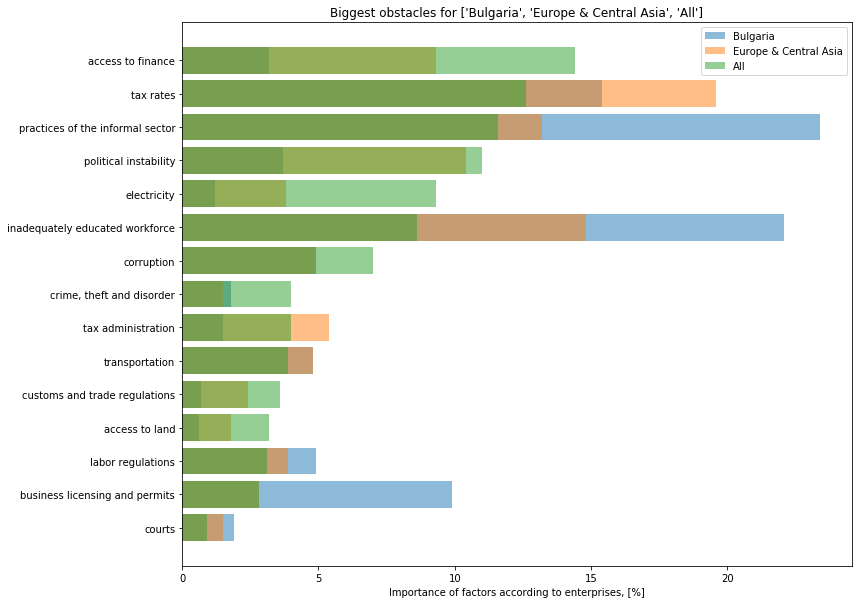

In [28]:
# defining the list
lst = ['Bulgaria', 'Europe & Central Asia', 'All']

#appying the function to draw the bars
bar_factors_for_list_of_countries(lst, top_level_obstacles, 1)

Obviously, we (bulgarians) look OK when it comes to 'access to finance', 'electricity', 'access to land' and 'customs and trade regulations'. It is more interesting to focus on the parts where the enterprises see real obstacles:

1. 'practices of the informal sector'
2. 'inadequately educated workforce'
3. 'business licensing and permits'

To imagine where Bulgaria stands among the other countries, I will design a small function which is going to plot a histogram of the whole column (for all Economies) and that will plot a line where Bulgaria is situated. The height of the bin aligned with Bulgaria's value will show how many countries have similar level of the problem.

In [29]:
def histogram_plot(problem, country_to_observe, title=" ", bins = 10):
    """
    plot a histogram of a 'problem' (for all Economies) with a line showing the value for the 'country_to_observe'.
    
    Parameters:
    problem: string containing the name the problematic factor to plot a histogram for
    country_to_observe: string showing the 'Economy' which specific value to be shown on the histogram
    title: optional string for title of the plot
    bins: integer size of the bins, as for a the ususal matplotlib histogram function, optional, default = 10
    """
    plt.hist(top_level_obstacles[problem], bins = bins)
    x = top_level_obstacles[top_level_obstacles.Economy == country_to_observe][problem].values
    plt.axvline(x, color = 'r', linestyle = 'dashed', linewidth = 2)
    plt.text(x + 1, 28, s = country_to_observe)
    plt.xlabel("Share of enterprises considering this factor as biggest obstacle [%]")
    plt.ylabel("No of countries")
    plt.title(title)
    plt.grid('true')

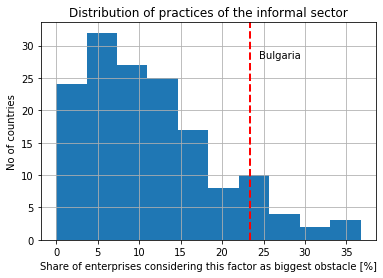

In [30]:
histogram_plot('practices of the informal sector', 'Bulgaria', title = 'Distribution of practices of the informal sector')

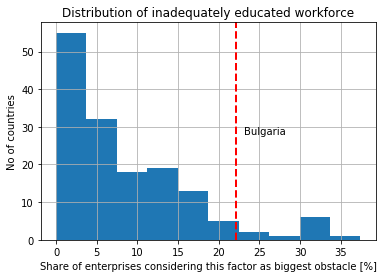

In [31]:
histogram_plot('inadequately educated workforce', 'Bulgaria', title = 'Distribution of inadequately educated workforce')

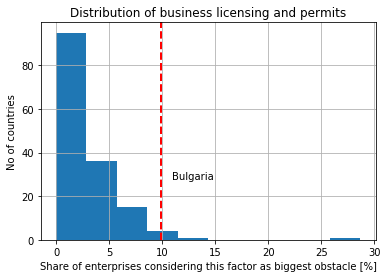

In [32]:
histogram_plot('business licensing and permits', 'Bulgaria', title = 'Distribution of business licensing and permits')

Wow! It seems Bulgaria is really bad placed for each of these factors. That require additional investigation...

#### 4. Digging in Bulgaria's part of the dataset

Let's do a separate table for Bulgaria from the initial table `obstacles_data` - we must check all the indexes with 'Bulgaria' and if so, we will put it in a separate variable `Bulgaria_obstacles`:

In [33]:
Bulgaria_obstacles = obstacles_data[obstacles_data['Economy'] == 'Bulgaria'].reset_index(drop=True)
# please, forgive non pythonic variable name, but Bulgaria should start with capital letter

In [34]:
Bulgaria_obstacles.shape

(261, 21)

It seems like the data for Bulgaria is a big dataset on its own:)

To simplify the job, the columns'names must be changed the way done above - using the `clear_list` function. Let's take a closer look at the problematic percentages afterwards: 'practices of the informal sector', 'business licensing and permits', 'inadequately educated workforce'.

In [35]:
# check that the function will work correctly
assert_equal(len(Bulgaria_obstacles.columns), len(clear_list(Bulgaria_obstacles.columns.tolist())))

In [36]:
# appying the clear_list function to the current columns
Bulgaria_obstacles.columns = clear_list(Bulgaria_obstacles.columns.tolist())

# focus on problematic points without removing the first 5 columns
bg_problematic = Bulgaria_obstacles[
                                    Bulgaria_obstacles.columns[:6].tolist() + 
                                    ['practices of the informal sector', 
                                     'business licensing and permits', 
                                     'inadequately educated workforce']
                                   ]

In [37]:
# test the number of columns is equal to : indexes (1) + 5 columns that we kept + 3 colums that we are interested in
assert_equal(1 + 5 + 3, bg_problematic.shape[1])

In [38]:
bg_problematic.head(15)

Economy    Year Subgroup Top Subgroup Level         Subgroup Level  \
0   Bulgaria  2007.0      NaN                NaN                    NaN   
1   Bulgaria  2007.0      NaN                NaN                    NaN   
2   Bulgaria  2007.0      NaN                NaN                    NaN   
3   Bulgaria  2007.0   Sector      Manufacturing                    All   
4   Bulgaria  2007.0   Sector      Manufacturing                    All   
5   Bulgaria  2007.0   Sector      Manufacturing                    All   
6   Bulgaria  2007.0   Sector      Manufacturing                   Food   
7   Bulgaria  2007.0   Sector      Manufacturing                   Food   
8   Bulgaria  2007.0   Sector      Manufacturing                   Food   
9   Bulgaria  2007.0   Sector      Manufacturing               Garments   
10  Bulgaria  2007.0   Sector      Manufacturing               Garments   
11  Bulgaria  2007.0   Sector      Manufacturing               Garments   
12  Bulgaria  2007.0   Sector      Manufacturing  Machinery & Equipment   
13  Bulgaria  2007.0   Sector      Manufacturing  Machinery & Equipment   
14  Bulgaria  2007.0   Sector      Manufacturing  Machinery & Equipment   

   Average/SE/N  practices of the informal sector  \
0       Average                              19.8   
1            SE                               3.0   
2             N                             995.0   
3       Average                              14.8   
4            SE                               1.9   
5             N                             626.0   
6       Average                              21.3   
7            SE                               4.1   
8             N                             144.0   
9       Average                              23.6   
10           SE                               4.3   
11            N                             139.0   
12      Average                               5.3   
13           SE                               3.2   
14            N                              91.0   

    business licensing and permits  inadequately educated workforce  
0                              5.4                             13.7  
1                              2.4                              2.7  
2                            995.0                            995.0  
3                              4.5                             13.2  
4                              1.4                              1.9  
5                            626.0                            626.0  
6                              6.0                              9.9  
7                              2.9                              3.1  
8                            144.0                            144.0  
9                              1.9                             15.9  
10                             1.2                              3.7  
11                           139.0                            139.0  
12                             1.8                             19.2  
13                             1.5                              9.9  
14                            91.0                             91.0

Let's check how many survey are done for Bulgaria:

In [39]:
bg_problematic.Year.unique()

array([2007., 2009., 2013., 2019.])

We can use now the fact that there are 4 researches done from 2007 to 2019 in Bulgaria. Let's see the development of the problematic factors from the lowest year 'til latest.

In [40]:
# keep only the comparable 'Average''s
bg_pb = bg_problematic[bg_problematic['Average/SE/N'] == 'Average']

In [41]:
# clear specific filters and leaving only the most common observations
bg_top_level_problematic = bg_pb[bg_pb['Top Subgroup Level'].isna() &
                                 bg_pb['Subgroup'].isna() &
                                 bg_pb['Subgroup Level'].isna()]

In [42]:
bg_top_level_problematic

Economy    Year Subgroup Top Subgroup Level Subgroup Level Average/SE/N  \
0    Bulgaria  2007.0      NaN                NaN            NaN      Average   
66   Bulgaria  2009.0      NaN                NaN            NaN      Average   
129  Bulgaria  2013.0      NaN                NaN            NaN      Average   
192  Bulgaria  2019.0      NaN                NaN            NaN      Average   

     practices of the informal sector  business licensing and permits  \
0                                19.8                             5.4   
66                               15.2                             2.1   
129                              25.9                             2.1   
192                              23.4                             9.9   

     inadequately educated workforce  
0                               13.7  
66                               9.0  
129                              4.3  
192                             22.1

Let's play a bit with the code and design a function applicable for many different cases, as we may need it in some other analysis somewhere below.

In [43]:
def plot_problematic(dataframe, problematic_list, to_label = ""):
    """
    Ploting lines of evolution of problems/factors in years defined by the years of conducted researches
    
    Parameters:
    dataframe : concerned dataframes provided as a list
    problematic_list : list of problematic obstacles
    to_label : the filter column of dataframes
    
    Return:
    - if only one dataframe is used, returns a single plot with all problems on it
    - if more than one dataframe are given generates a plots  for each problem separately (max 3 per row)
    """
    if len(dataframe) == 1:
        plt.figure(figsize=(8, 6))
        
        data = dataframe[0]
        for obstacle in problematic_list:
            plt.plot(data.Year.tolist(), data[obstacle].tolist(), label = obstacle)

        plt.title('Evolution of most problematic obstacles with time')
        plt.ylabel('Enterprises considering the obstacle as the biggest one, [%]')
        plt.xticks(data.Year)
        plt.xlabel('Year')
        plt.legend()
        
    # case with more than 1 dataframe: using plt.subplots() to have separated plots with same problem from different dataframes
    else: 
        # definition of rows and columns, max columns are 3.
        rows = 1
        cols = len(problematic_list)
        if len(problematic_list) > 3:
            cols = 3
            rows = len(problematic_list) // 3
            if len(problematic_list) % 3 != 0:
                rows += 1
           
        # designing the subplots    
        fig, axs = plt.subplots(rows, cols, figsize=(16, 7), sharey=True)
        
        # filling in each plot
        # as plt.subplots provide two-dimensional array (one dimension for the rows, one for the columns) for the axis, 
        # we should use it with flatten().
        for data in dataframe:
            for obstacle, ax in zip(problematic_list, axs.flatten()):
                # check for providen labels
                if to_label:
                    ax.plot(data.Year.tolist(), data[obstacle].tolist(), label = data[to_label].unique()[0])
                    ax.legend()
                else:
                    ax.plot(data.Year.tolist(), data[obstacle].tolist())
                # setting title = obstacle for each plot
                ax.set_title(obstacle)
        
        # common x_label and y_label insertion
        for ax in axs.flat:
            ax.set(xlabel='Year', ylabel='Enterprises considering the respective\nobstacle as the biggest one, [%]', 
                   xticks = dataframe[0].Year)

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()
        #common title
        fig.suptitle('Evolution of most problematic obstacles with time')
    plt.show()

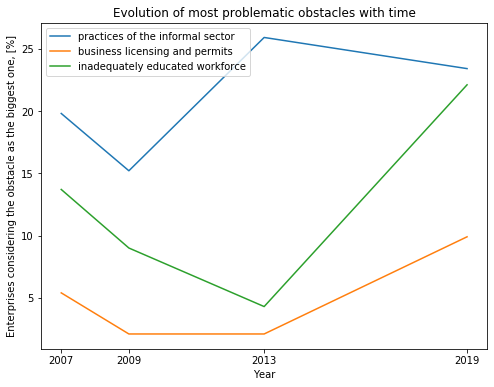

In [44]:
# limiting the list to the problematic observations
problematic_list = ['practices of the informal sector', 'business licensing and permits', 'inadequately educated workforce']
# let's use and plot the development of these fators with time
plot_problematic([bg_top_level_problematic], problematic_list)

#### 5. Design and perform test hypothesis

It seems that there is not much done in the last year to improve these main obstacles in Bulgaria since our acceptance in EU. On the opposite, all of them deteriorate... Lets'check if it is valid no matter the sector (service or manufacturing) and if it is related to the gender of the management. ***When I insert such a separation between female and male managers, I do not aim to discriminate any of them. On the opposite, I am trying to defend the statement of the gender equality***. Obviously, Word Bank is interested in this feature and inserts it when requesting the surveys. 

So, it is time to make a hypothese now, actually a pair of hypothesis.

I want to see if there is a correlation in the answers between sectors (manufacturer or service) as well as in the perception of female/male managers in the obstacle's "weight" definitions:

* $H_0$ - there is nothing that connects the opinions on the obstacles during the year no matter the sector, nor the gender of the management. In shorter terms there is no correlation at all between these pair of groups;
* $H_1$ - there is no difference in the perception depending on the sector or the gender and they all feel same improvement/deterioration in the obstacles they face as enterprises, because they are all correlated.

I will assume that $H_0$ is true. The "threshold value" of $p$ (or $p$-value), that this test returns is usually set to 5% (0.05), and if I am even more than sure, I could set it to 1%. Still, I will put it at 6% as the sample is really too small - we talk for 4 values only. So, if $H_0$ is rejected, there will still be 6% chance that it rejected wrongly. To resume:

**If $p\le6\%$, I will reject $H_0$**.

To compare each pair, it's easiest to perform what's called a **t-test**. For that I will need to import `from scipy.stats import ttest_ind` in the import part on top of this document. I have to start straigth from `bg_pb` variable and in order to use it in the ttest, I need to provide the comparable data as type `pandas.core.series.Series`. I will need some test for that too :)

So, let's start with the test between "*Manufacturing*" and "*Services*".

In [45]:
# for simplicity going first to Subgroup level 'Sector'
bg_pb_sector = bg_pb[(bg_pb['Subgroup'] == 'Sector') & (bg_pb['Subgroup Level'] == 'All')]

# dividing the DataFrames to 'Manufacturing' and 'Services'
bg_manufacturing = bg_pb_sector[bg_pb_sector['Top Subgroup Level'] == 'Manufacturing']
bg_services = bg_pb_sector[bg_pb_sector['Top Subgroup Level'] == 'Services']

# quick check with print function
print(bg_services)
print(type(bg_services))

# type tests
for obstacle in problematic_list:
    assert_equal(pd.core.series.Series, type(bg_manufacturing[obstacle]))

      Economy    Year Subgroup Top Subgroup Level Subgroup Level Average/SE/N  \
21   Bulgaria  2007.0   Sector           Services            All      Average   
75   Bulgaria  2009.0   Sector           Services            All      Average   
138  Bulgaria  2013.0   Sector           Services            All      Average   
207  Bulgaria  2019.0   Sector           Services            All      Average   

     practices of the informal sector  business licensing and permits  \
21                               22.1                             5.8   
75                               17.4                             1.6   
138                              27.2                             2.3   
207                              25.5                            12.6   

     inadequately educated workforce  
21                              13.9  
75                               9.5  
138                              3.6  
207                             18.0  
<class 'pandas.core.frame.DataFra

We can use the `plot_problematic` function designed above to see how actually these obstacles look like. 

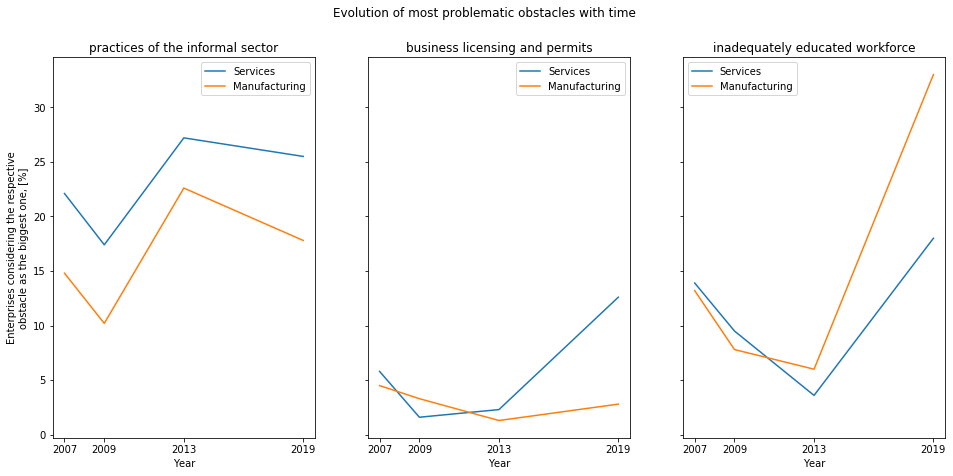

In [46]:
data_lst = [bg_services, bg_manufacturing]
plot_problematic(data_lst, problematic_list, 'Top Subgroup Level')

Hmm... the correlation seem visible for some of them, but let's check what the scientifical method will show.

Now, to simplify our future life, let's create a function for testing all the variables:

In [47]:
def ttest_conduct(dataframe_list, list_obstacles):
    """
    Conducting paired ttest on two different dataframes on different problematic's list when ttest is imported from sklearn
    
    Parameters:
    dataframe_list : list(dataframes)
    list_obstacles : list(problems/obstacles)
    
    Return:
    for each problem/obstacle return a p-Value and statement whether the H0 should be rejected or not.
    """
    
    for obstacle in list_obstacles:
        first_variable = dataframe_list[0][obstacle]
        second_variable = dataframe_list[1][obstacle]
        
        # using Welch's t-test, or unequal variances t-test as more stable "equal_var=False", 
        # despite Student's test is fully applicable in this case "equal_var=True"
        test_result = ttest_ind(first_variable, second_variable, equal_var=False) 

        print(f"p-value = {test_result.pvalue} --- for test on '{obstacle}'")
        if test_result.pvalue <= 0.05:
            print(f"The differences between {dataframe_list[0]} and {dataframe_list[1]} are significant. Reject H0.")
        else:
            print("There's not enough evidence to reject H0. Don't accept or reject anything else.")
        print("-" * 25)

In [48]:
# applying the test
ttest_conduct([bg_services, bg_manufacturing], problematic_list)

p-value = 0.0966843904266147 --- for test on 'practices of the informal sector'
There's not enough evidence to reject H0. Don't accept or reject anything else.
-------------------------
p-value = 0.3830063020313388 --- for test on 'business licensing and permits'
There's not enough evidence to reject H0. Don't accept or reject anything else.
-------------------------
p-value = 0.6140400479832693 --- for test on 'inadequately educated workforce'
There's not enough evidence to reject H0. Don't accept or reject anything else.
-------------------------


Unfortunately, we can't reject the $H_0$ hypothesis for none of the obstacles. At least scientifically, <u>we can't claim anything</u>.

Next step is the male/female management test.

In [49]:
# dividing the DataFrames to 'femal' and 'male'
bg_pb_female = bg_pb[(bg_pb['Subgroup'] == 'Gender of Top Manager') & (bg_pb['Subgroup Level'] == 'Top manager is female')]
bg_pb_male = bg_pb[(bg_pb['Subgroup'] == 'Gender of Top Manager') & (bg_pb['Subgroup Level'] == 'Top manager is male')]
print(bg_pb_female)

# type tests
for obstacle in problematic_list:
    assert_equal(pd.core.series.Series, type(bg_manufacturing[obstacle]))

      Economy    Year               Subgroup Top Subgroup Level  \
117  Bulgaria  2009.0  Gender of Top Manager                NaN   
180  Bulgaria  2013.0  Gender of Top Manager                NaN   
249  Bulgaria  2019.0  Gender of Top Manager                NaN   

            Subgroup Level Average/SE/N  practices of the informal sector  \
117  Top manager is female      Average                              11.6   
180  Top manager is female      Average                              20.2   
249  Top manager is female      Average                              20.0   

     business licensing and permits  inadequately educated workforce  
117                             2.8                             10.4  
180                             0.0                              4.1  
249                            27.9                             18.3  


In [50]:
# defining the list as entry parameter of our function
data_lst = [bg_pb_female, bg_pb_male]

# applying the function
ttest_conduct(data_lst, problematic_list)

p-value = 0.26000598268974073 --- for test on 'practices of the informal sector'
There's not enough evidence to reject H0. Don't accept or reject anything else.
-------------------------
p-value = 0.47199152053059396 --- for test on 'business licensing and permits'
There's not enough evidence to reject H0. Don't accept or reject anything else.
-------------------------
p-value = 0.8692206136140295 --- for test on 'inadequately educated workforce'
There's not enough evidence to reject H0. Don't accept or reject anything else.
-------------------------


We can conduct the `ttest`, but it is visible that with one year less the results can be visually checked on graphs.

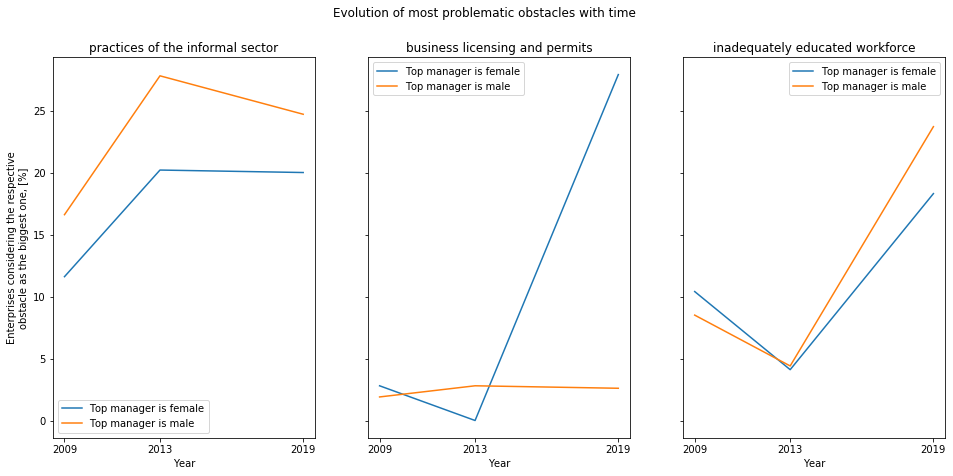

In [51]:
plot_problematic(data_lst, problematic_list, 'Subgroup Level')


At this stage, <u>we can't confirm nor reject any of our hypothesis with full certainity</u>. 

Visually we can only say that on first glance it seems the enterprises with female management feel more problems than the others. 

Speaking of male/female, we can check where is Bulgaria in the sense of gender equality and access for females to management position.


***III.*** **Gender equality in the enterprises worldwide and Bulgaria**

Before looking at the data, I will form a preliminary hypothesis of mine that Bulgaria stands on a relatively good position compared to the worldwide average and that it is improving with time considerably. As usually we start with the first step:

#### 1. Reading the data

In [52]:
gender_data = pd.read_csv('data/gender.csv')

In [53]:
gender_data.head(10)

Economy    Year Subgroup Top Subgroup Level  \
0                         All     NaN      NaN                NaN   
1         East Asia & Pacific     NaN      NaN                NaN   
2       Europe & Central Asia     NaN      NaN                NaN   
3           High income: OECD     NaN      NaN                NaN   
4   Latin America & Caribbean     NaN      NaN                NaN   
5  Middle East & North Africa     NaN      NaN                NaN   
6                  South Asia     NaN      NaN                NaN   
7          Sub-Saharan Africa     NaN      NaN                NaN   
8                 Afghanistan  2008.0      NaN                NaN   
9                 Afghanistan  2008.0      NaN                NaN   

  Subgroup Level Average/SE/N  \
0            NaN      Average   
1            NaN      Average   
2            NaN      Average   
3            NaN      Average   
4            NaN      Average   
5            NaN      Average   
6            NaN      Average   
7            NaN      Average   
8            NaN      Average   
9            NaN           SE   

  Percent of firms with female participation in ownership  \
0                                               35.2        
1                                               52.7        
2                                               32.4        
3                                               37.8        
4                                               45.6        
5                                               19.8        
6                                               18.4        
7                                                 29        
8                                                2.8        
9                                                0.7        

  Percent of firms with majority female ownership  \
0                                            14.6   
1                                            28.8   
2                                            14.6   
3                                               8   
4                                            19.9   
5                                             3.8   
6                                             9.6   
7                                            12.3   
8                                             NaN   
9                                             NaN   

  Percent of firms with a female top manager  \
0                                       18.2   
1                                       32.8   
2                                       18.9   
3                                         14   
4                                       21.4   
5                                        6.3   
6                                         11   
7                                       15.2   
8                                        0.7   
9                                        0.4   

  Proportion of permanent full-time workers that are female (%)  \
0                                               33.5              
1                                               38.9              
2                                               40.1              
3                                               41.2              
4                                               37.6              
5                                               21.8              
6                                               18.3              
7                                               28.2              
8                                                3.3              
9                                                0.5              

  Proportion of permanent full-time production workers that are female (%)*  \
0                                               27.3                          
1                                               39.5                          
2                                               38.7                          
3                                               33.6       

I think we can confirm that the skeleton of the data is similar to the one used above. That makes the further cleaning of the data more easy. I'll make the cleaning of the data, starting this time with some filitering of the `Average/SE/N` column. 

In [54]:
# leaving only the useful data available in the rows with 'Average' in 'Average/SE/N' column
gender_data1 = gender_data[gender_data['Average/SE/N'] == 'Average']

In [55]:
gender_data1.head()

Economy  Year Subgroup Top Subgroup Level Subgroup Level  \
0                        All   NaN      NaN                NaN            NaN   
1        East Asia & Pacific   NaN      NaN                NaN            NaN   
2      Europe & Central Asia   NaN      NaN                NaN            NaN   
3          High income: OECD   NaN      NaN                NaN            NaN   
4  Latin America & Caribbean   NaN      NaN                NaN            NaN   

  Average/SE/N Percent of firms with female participation in ownership  \
0      Average                                               35.2        
1      Average                                               52.7        
2      Average                                               32.4        
3      Average                                               37.8        
4      Average                                               45.6        

  Percent of firms with majority female ownership  \
0                                            14.6   
1                                            28.8   
2                                            14.6   
3                                               8   
4                                            19.9   

  Percent of firms with a female top manager  \
0                                       18.2   
1                                       32.8   
2                                       18.9   
3                                         14   
4                                       21.4   

  Proportion of permanent full-time workers that are female (%)  \
0                                               33.5              
1                                               38.9              
2                                               40.1              
3                                               41.2              
4                                               37.6              

  Proportion of permanent full-time production workers that are female (%)*  \
0                                               27.3                          
1                                               39.5                          
2                                               38.7                          
3                                               33.6                          
4                                               23.5                          

  Proportion of permanent full-time non-production workers that are female (%)*  
0                                               37.7                             
1                                                 36                             
2                                               50.3                             
3                                                 50                             
4                                               45.1

In [56]:
# now we can remove this column and save the dataframe in another temporary variable
gender_data1 = gender_data1.drop(['Average/SE/N'], axis = 1)

After removing the unnecessairy rows, we come to the moment where we will need to clean all the old researches and leave only the most recent one per country.

In [57]:
gender_data1.Year.unique()

array([  nan, 2008., 2014., 2007., 2013., 2019., 2006., 2010., 2017.,
       2009., 2018., 2016., 2015., 2011., 2012., 2020.])

In [58]:
# taking out the common group
common_gender = gender_data1.loc[0 : 7]

# applying the filter as decribed
gender_data_latest = gender_data1[gender_data1['Year'] == gender_data1.groupby('Economy')['Year'].transform('max')]

# concatenating both groups
latest_gender_data = pd.concat([common_gender, gender_data_latest], ignore_index = True)

In [59]:
# checking  the columns of the prepared dataframe
latest_gender_data.columns

# -> obviously too long

Index(['Economy', 'Year', 'Subgroup', 'Top Subgroup Level', 'Subgroup Level',
       'Percent of firms with female participation in ownership',
       'Percent of firms with majority female ownership',
       'Percent of firms with a female top manager',
       'Proportion of permanent full-time workers that are female (%)',
       'Proportion of permanent full-time production workers that are female (%)*',
       'Proportion of permanent full-time non-production workers that are female (%)*'],
      dtype='object')

In [60]:
# to change the column names, we will use the 'clear_list' function created above
new_col_names = clear_list(latest_gender_data.columns.to_list(), pattern= r'^Percent\sof\sfirms\swith\s(.+)$')

# we have to do it on two rounds
new_col_names = clear_list(new_col_names, pattern = r'^Proportion\sof\spermanent\sfull-time\s(.+)$')

In [61]:
# showing the list of the future column names left after the changes
new_col_names

['Economy',
 'Year',
 'Subgroup',
 'Top Subgroup Level',
 'Subgroup Level',
 'female participation in ownership',
 'majority female ownership',
 'a female top manager',
 'workers that are female (%)',
 'production workers that are female (%)*',
 'non-production workers that are female (%)*']

In [62]:
# applying the new list as a column names of the dataframe
latest_gender_data.columns = new_col_names

In [63]:
# a brief test that no column has been deleted
assert_equal(gender_data1.shape[1], latest_gender_data.shape[1])

#### 2. Inspect and fill missing data

This always starts with exploring the content of the dataset:

In [64]:
latest_gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Economy                                      2928 non-null   object 
 1   Year                                         2920 non-null   float64
 2   Subgroup                                     2776 non-null   object 
 3   Top Subgroup Level                           912 non-null    object 
 4   Subgroup Level                               2776 non-null   object 
 5   female participation in ownership            2928 non-null   object 
 6   majority female ownership                    2390 non-null   object 
 7   a female top manager                         2810 non-null   object 
 8   workers that are female (%)                  2917 non-null   object 
 9   production workers that are female (%)*      2197 non-null   object 
 10  

There is a problem for columns 5 to 10, where instead of `objects`, the types should be `float64`. As familiar with the problematic points, I need to replace again the strings `n.a.`, `n.c.` with `np.nan` and `,` with `.` using the respective functions.

In [65]:
# replace the 'n.c.', 'n.a.'
latest_gender_data.replace(to_replace = ['n.c.', 'n.a.'], value = np.nan, inplace = True)

# replace the ',' with '.'
latest_gender_data.replace(to_replace = r'(,)', value = '.', regex = True, inplace = True)

# for each column starting from column 5 we do the transformation
for col in latest_gender_data.columns[5:]:
    latest_gender_data[col] = latest_gender_data[col].astype(float)

In [66]:
# test
for col in latest_gender_data.columns[5:]:
    assert_equal(latest_gender_data[col].dtype, 'float64')

#### 3. Explore the data and analysis. Make comparatives.

That starts always with a brief visual check of the dataframe.

In [67]:
latest_gender_data.head()

Economy  Year Subgroup Top Subgroup Level Subgroup Level  \
0                        All   NaN      NaN                NaN            NaN   
1        East Asia & Pacific   NaN      NaN                NaN            NaN   
2      Europe & Central Asia   NaN      NaN                NaN            NaN   
3          High income: OECD   NaN      NaN                NaN            NaN   
4  Latin America & Caribbean   NaN      NaN                NaN            NaN   

   female participation in ownership  majority female ownership  \
0                               35.2                       14.6   
1                               52.7                       28.8   
2                               32.4                       14.6   
3                               37.8                        8.0   
4                               45.6                       19.9   

   a female top manager  workers that are female (%)  \
0                  18.2                         33.5   
1                  32.8                         38.9   
2                  18.9                         40.1   
3                  14.0                         41.2   
4                  21.4                         37.6   

   production workers that are female (%)*  \
0                                     27.3   
1                                     39.5   
2                                     38.7   
3                                     33.6   
4                                     23.5   

   non-production workers that are female (%)*  
0                                         37.7  
1                                         36.0  
2                                         50.3  
3                                         50.0  
4                                         45.1

The column names remain longer than it is convenient for usual bar charts. Fortunately, I have created a function that we can directly apply directly here again as created above - `bar_factors_for_list_of_countries` function. That is the beauty of programming - automation :)

In [68]:
print(bar_factors_for_list_of_countries.__doc__)


    Plot a horizontal bar graph for all contries given in a list for each column starting from concrete index
    
    Parameters:
    lst : list of countries (preferably up to 3 for the sake of readability)
    dataframe : pandas' DataFrame with 'Economy' column representing the countries
    index : index of column (first column index = 0) from which the data should be present on the graph
    title : optional title
    


What was expected from this function was: a list of countries (in this case 'Economy'), a dataframe, index of column, even an option for title. Good, let's try it:

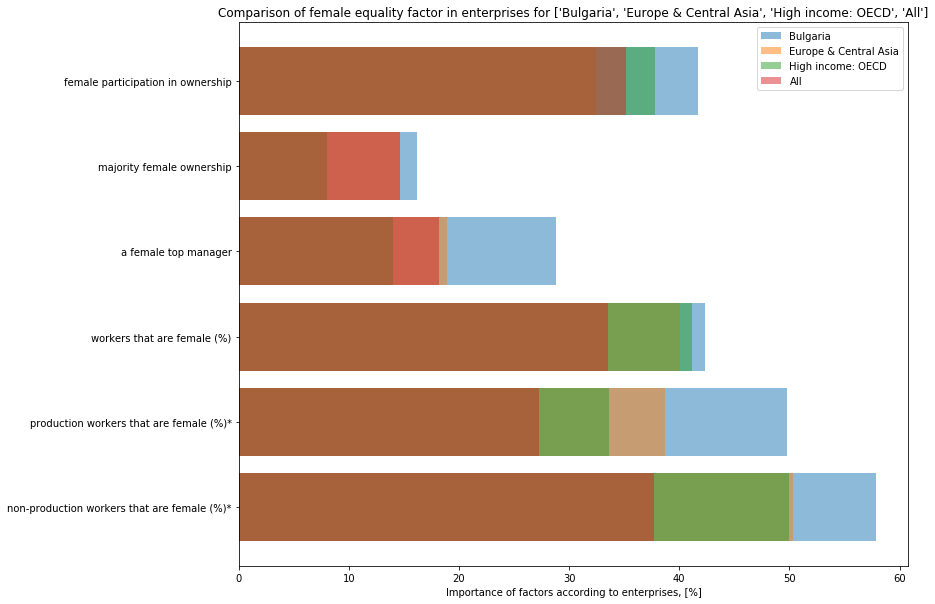

In [69]:
bar_factors_for_list_of_countries(['Bulgaria', 'Europe & Central Asia', 'High income: OECD', 'All'], 
                                  latest_gender_data, 5, title = "Comparison of female equality factor in enterprises")

Choosing four "economies" makes it a bit too crowded and not very readable, but still we can understand immediately, without applying statistical methods that in our region, even compared to the 'High income' countries and worldwide average ('All'), as stated above as hypothesis, Bulgaria is above the average. I can play around to make prettier chart, but it won't lead to any different conclusion. Maybe it could be interesting to check the ranking of Bulgaria among the countries worldwide. Well, instead, let's concentrate on another aspect.

It looks to me for the moment, that the last three factors are less interesting compared to the 3 on top of this horizontal bar chart. It will be also interesting to see if there is a correlation beween the factor of 'female ownership' and 'female top managers'. Sounds logical, but whether it is true on global average... Let's check this!

The easiest and fastest first check is to find the correlation between the two column. Applying it directly can 'mislead' the calculation because for each country there are numerous split of same information based on `Subgroup`, `Top Subgroup Level` and `Subgroup Level`, thus uncontrollable repetition of some of the data. Therefore, we'd better clean a bit first. As we must avoid any unnecessairy split in the data, we must clean at the `Subgroup Level` and remain with the most common for each country:

In [70]:
# cleaning the data before checking the correlation
combined_level_gender_data = latest_gender_data[latest_gender_data['Subgroup Level'].isna()]

# correlation between 'a female top manager' and 'majority female ownership'
corr_a = combined_level_gender_data['a female top manager'].corr(combined_level_gender_data['majority female ownership'])
print('Correlation between "female Top Manager" and "majority female ownership" =', corr_a)

# correlation between 'a female top manager' and 'majority female ownership'
corr_b = combined_level_gender_data['a female top manager'].corr(combined_level_gender_data['female participation in ownership'])
print('Correlation between "female Top Manager" and "female participation in ownership" =', corr_b)

Correlation between "female Top Manager" and "majority female ownership" = 0.8047764563257315
Correlation between "female Top Manager" and "female participation in ownership" = 0.5635301587938372


This is kind of logical, isn't it? So, in order to reach perfect gender equality, there should be increase in the '`female participation in ownership`', along with some improvement in '`majority female ownership`' factor to keep the correlation level (as the data for the second factor is part of the first).

On the other hand, it is interesting to check whether there is a split of '*Top Manager's gender*' depending on the sector. To verify that I need to get back to my `latest_gender_data` dataset and filter the top managers on male and female, then show both with a pie charts split on '*Services*' and '*Manufacturing*' sectors. There is one problem though - the 'Sector' filter and 'Gender of Top Manager' filter are on the same level in the 'Subgroup' column.

In [71]:
latest_gender_data['Subgroup'].unique()

array([nan, 'Sector', 'Size', 'Location', 'Exporter Type',
       'Gender of Top Manager', 'Ownership Type'], dtype=object)

So, with my dataset I have to use different approach and start with service/manufacturing split and then male/female Top manager split. In fact for Top manager split I can use the values in '`a female top manager`' column only. That's fine:

In [72]:
# filter manufacturing
gender_manufacturing_data = latest_gender_data[(latest_gender_data['Top Subgroup Level'] == 'Manufacturing') & 
                                                    (latest_gender_data['Subgroup Level'] == 'All')]

# filter services
gender_services_data = latest_gender_data[(latest_gender_data['Top Subgroup Level'] == 'Services') & 
                                               (latest_gender_data['Subgroup Level'] == 'All')]

After the initial first step of spliting the data in '*Manufacturer*' and '*Services*' there is data left only on country level and not on global or regional average. Relying on the representativity of the researches in each country (each survey is representative sample of the enterprises) from one side and on the fact that our sample is big enough to rely on ***Central limit theorem*** from the other side, I can use the mean of all countries to show the results.

In [73]:
def draw_pie(variable, title="", labels= ['female', 'male']):
    """
    Draw pie function of bipolar variable
    
    variable : a sigle value are the remaining part of the circle will represent 100 - variable's value
    title : string representing optional title to be set on top of the chart
    labels: list of 2 values, the first one corresponding to the variable, default = ['female', 'male']
    """
    plt.gca().set_aspect("equal")
    plt.pie([variable, 100 - variable], labels = labels, autopct = "%.2f%%")
    plt.title(title)
    plt.show()

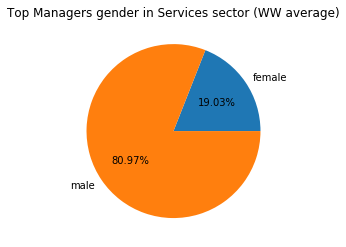

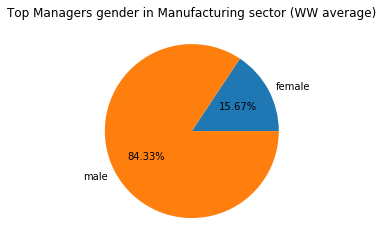

In [74]:
#using the means
serv_mean = gender_services_data['a female top manager'].mean()
manuf_mean = gender_manufacturing_data['a female top manager'].mean()

# drawing the pies
draw_pie(serv_mean, "Top Managers gender in Services sector (WW average)")
draw_pie(manuf_mean, "Top Managers gender in Manufacturing sector (WW average)")

It seems there is a small predominance of female Top Managers in the `Services` sector, but one can't say that they are not enough women as Top Managers in `Manufacturing` sector.
Let's quickly check the same for the enterprises with `female participation in ownership`.

In [75]:
gender_manufacturing_data

Economy    Year Subgroup Top Subgroup Level Subgroup Level  \
9             Afghanistan  2014.0   Sector      Manufacturing            All   
29                Albania  2019.0   Sector      Manufacturing            All   
47                 Angola  2010.0   Sector      Manufacturing            All   
65    Antigua and Barbuda  2010.0   Sector      Manufacturing            All   
80              Argentina  2017.0   Sector      Manufacturing            All   
...                   ...     ...      ...                ...            ...   
2830              Vietnam  2015.0   Sector      Manufacturing            All   
2853   West Bank and Gaza  2019.0   Sector      Manufacturing            All   
2870          Yemen. Rep.  2013.0   Sector      Manufacturing            All   
2887               Zambia  2019.0   Sector      Manufacturing            All   
2908             Zimbabwe  2016.0   Sector      Manufacturing            All   

      female participation in ownership  majority female ownership  \
9                                   5.3                        1.4   
29                                 22.9                       17.0   
47                                 55.6                        8.6   
65                                 11.7                        NaN   
80                                 59.0                       10.6   
...                                 ...                        ...   
2830                               43.8                       14.9   
2853                                1.0                        0.0   
2870                                2.2                        0.0   
2887                               33.9                       13.5   
2908                               47.1                       14.7   

      a female top manager  workers that are female (%)  \
9                      8.2                         29.6   
29                    22.1                         99.0   
47                    10.6                         58.7   
65                     6.0                         27.5   
80                     8.2                         21.5   
...                    ...                          ...   
2830                  16.9                         36.1   
2853                   0.0                         10.5   
2870                   0.0                          3.3   
2887                   7.2                         44.9   
2908                   9.7                         23.3   

      production workers that are female (%)*  \
9                                        34.3   
29                                       99.8   
47                                       49.5   
65                                        NaN   
80                                       13.1   
...                                       ...   
2830                                     32.5   
2853                                      9.6   
2870                                      3.3   
2887                                     45.2   
2908                                     19.3   

      non-production workers that are female (%)*  
9                                            47.2  
29                                           98.4  
47                                           58.5  
65                                            NaN  
80                                           40.1  
...                                           ...  
2830                                         42.5  
2853                                         12.2  
2870                                          4.3  
2887                                         41.5  
2908                                         33.6  

[144 rows x 11 columns]

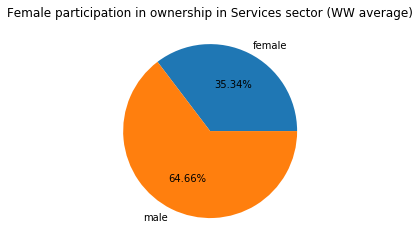

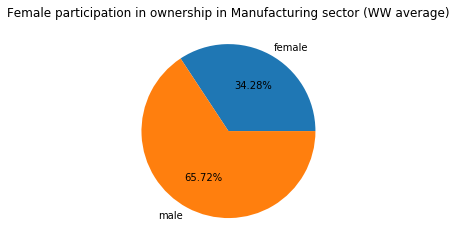

In [76]:
#using the means
ownership_serv_mean = gender_services_data['female participation in ownership'].mean()
ownership_manuf_mean = gender_manufacturing_data['female participation in ownership'].mean()

# drawing the pies
draw_pie(ownership_serv_mean, "Female participation in ownership in Services sector (WW average)")
draw_pie(ownership_manuf_mean, "Female participation in ownership in Manufacturing sector (WW average)")

Obviously, there is nothig hidden here either that can say that there is only one sector that on global average is driving the *gender equality down*.

Now, for the last, let's see what is the development of the female ownership in time on global average and for Bulgaria. For that I need to go back to `gender_data1` table and do again quickly cleaning of the data.

In [77]:
# create new variable with data on total economy(country) level
ownership_data = gender_data1[gender_data1['Subgroup Level'].isna()].reset_index(drop = True)

# use the list for shorter names
ownership_data.columns = new_col_names

# drop the columns with 0 non-null values
ownership_data = ownership_data.drop(['Subgroup', 'Subgroup Level', 'Top Subgroup Level'], axis = 1)

In [78]:
# overall first check of the table
ownership_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Economy                                      298 non-null    object 
 1   Year                                         290 non-null    float64
 2   female participation in ownership            296 non-null    object 
 3   majority female ownership                    177 non-null    object 
 4   a female top manager                         246 non-null    object 
 5   workers that are female (%)                  297 non-null    object 
 6   production workers that are female (%)*      261 non-null    object 
 7   non-production workers that are female (%)*  261 non-null    object 
dtypes: float64(1), object(7)
memory usage: 18.8+ KB


In [79]:
# replace the 'n.c.', 'n.a.'
ownership_data.replace(to_replace = ['n.c.', 'n.a.'], value = np.nan, inplace = True)

# for each column starting from column 2 we do the transformation
for col in ownership_data.columns[2:]:
    ownership_data[col] = ownership_data[col].astype(float)

In [80]:
# last check of the data
for column in ownership_data.columns[2:]:
    assert_equal(ownership_data[column].dtype, 'float64')

As we are intersted in the `female participation in ownership` and `Year` there should be no null values (NaN values) there. So, based on `info()` table I define my first next steps as:
1. to deal with 2 null values in `female participation in ownership`
2. to deal with 8 null values in `Year` - the common *Economies*

In [81]:
# deal with 1.
ownership_data.dropna(subset = ['female participation in ownership'], inplace = True)
# quick test
assert_equal(ownership_data['female participation in ownership'].count(), 296)

In [82]:
# deal with 2.
years_list = sorted(ownership_data.Year.unique().tolist())[1:]

After dealing with these 2 points, I will prepare a quick function for ploting the timeline of female ownership development.

In [83]:
# designing separate function for quick line plot with set x_label
def plot_xy(data_x, data_y, label = ""):
    """
    ploting a line with data_x (accepting 'Year' values as list) and data_y (respective female ownership in % as list)
    """
    plt.plot(data_x, data_y, label = label)
    plt.xlabel("Year")
    plt.xticks(data_x)
    plt.ylabel("Avg global female ownership %")
    plt.title("Shares of enterprises with female participation in ownership with years")
    plt.legend()
    plt.show()

This function will be used next, but in order to prepare the data as input for it,  I will make a list containing each year's mean value. The surveys are not done each year for all countries. Whether it is a question of budget or other, the surveys are made on waves. Each year one wave of surveys is launched for given number of countries. I will accept as representative for average global level the data defined by the mean of at least 10 countries (it is like defining the size of the bins when using histogram). 

Generating list...
Appending year 2006 in the list for plot with 27 country surveys
Appending year 2007 in the list for plot with 13 country surveys
Appending year 2009 in the list for plot with 52 country surveys
Appending year 2010 in the list for plot with 35 country surveys
Appending year 2013 in the list for plot with 48 country surveys
Appending year 2014 in the list for plot with 12 country surveys
Appending year 2016 in the list for plot with 18 country surveys
Appending year 2017 in the list for plot with 11 country surveys
Appending year 2019 in the list for plot with 38 country surveys

Jobs DONE!!!
Omitted years due to insufficient amount of countries'surveys: 6
Appended years: 9
---------------
Plotting the chart for:
x =  [2006, 2007, 2009, 2010, 2013, 2014, 2016, 2017, 2019]
y =  [32.52, 25.86, 38.45, 40.26, 30.57, 24.17, 35.32, 47.79, 30.32]


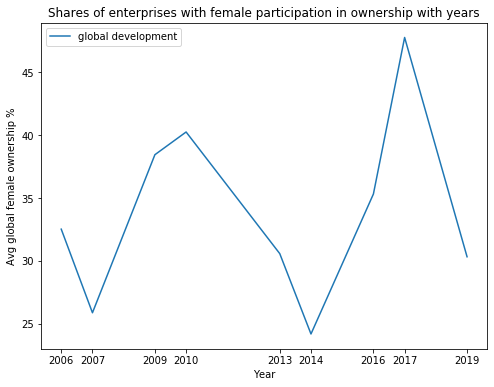

In [84]:
data_x = [] # list accepting year
data_y = [] # list accepting female ownership values
count = 0 # count of rejected possible values
print("Generating list...")
for year in years_list:
    list_per_year = ownership_data[ownership_data.Year == year]['female participation in ownership']
    # appending only the with min 10 countries'suveys")
    if len(list_per_year) > 10:
        print(f"Appending year {int(year)} in the list for plot with {len(list_per_year)} country surveys")
        data_y.append(round(list_per_year.mean(), 2))
        data_x.append(int(year))
    else:
        count += 1
print(f"\nJobs DONE!!!\nOmitted years due to insufficient amount of countries'surveys: {count}\nAppended years: {len(data_y)}")
print("-"*15)
print("Plotting the chart for:")

print("x = ", data_x)
print("y = " , data_y)
plt.figure(figsize = (8, 6))
plot_xy(data_x, data_y, "global development")

The plotted line looks very unstable. Even if it seems there is some decrease in ownership after the years of the last crisis (2009), we can't say anything definitive for two reasons:

1. The plot shows the average share of enterprises with female participation in ownership. Therefore, it is not evident that this drop can be linked with the crisis, because that would mean that all or the majority of bankrupted enterprises would be those with female ownership.
2. The number of observations entering for some of the year is close to the minimum defined at 11. For instance, in the 2017 value is literally at that minimum (only 11 surveys).

In case the value for 2017 is removed the trend would be even decreasing, but acording to the threshold defined as acceptable (more then 10 surveys) this value (despite questionable) is also acceptable. What hsould be the correct threshold - I do not know.

That is why, I will design another, more robust approach. 

It will calculate the average considering all countries where the survey has been conducted, taking the latest available data for each country for the given year. (If a survey for a country for this year has not been conducted, the value from the past available survey will be considedred in the calculation of the mean, in case it is available at all.)

Generating lists... DONE
Plotting the chart for:
x =  [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
y =  [32.52, 30.36, 31.34, 35.03, 36.81, 36.77, 36.98, 35.23, 34.9, 35.04, 34.78, 35.94, 35.85, 35.14, 35.05]


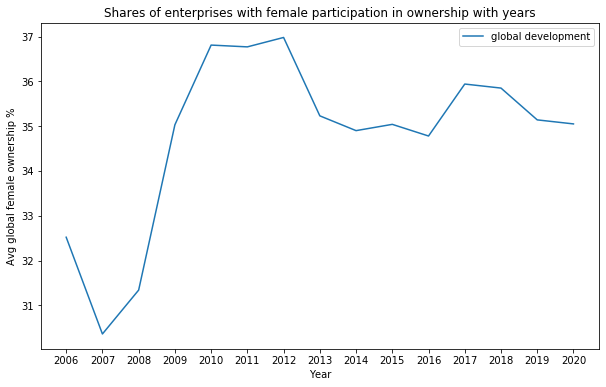

In [85]:
print("Generating lists...", end=" ")
df = ownership_data[ownership_data.Year == years_list[0]][['Economy', 'female participation in ownership']]
data_x = [int(years_list[0])] # list accepting year, initialized with the first year a survey has been launched
data_y = [round(df['female participation in ownership'].mean(), 2)] # list accepting the mean based on last available surveys
for year in years_list[1:]:
    df_new = ownership_data[ownership_data.Year == year][['Economy', 'female participation in ownership']]
    # merging df with old year and df_new with the new year
    df_outer = pd.merge(df, df_new, on='Economy', how='outer', sort = True, suffixes=('_1', '_2'))
    # and creating a column 'join' which takes only the latest data for each country
    df_outer.loc[df_outer['female participation in ownership_2'].isnull(),'join'] = \
                 df_outer['female participation in ownership_1']
    df_outer.loc[df_outer['female participation in ownership_2'].notnull(), 'join'] = \
                 df_outer['female participation in ownership_2']
    # appending
    data_y.append(round(df_outer['join'].mean(), 2))
    data_x.append(int(year))
    # transforimg df_outer['join'] to df
    df = df_outer[['Economy', 'join']]
    df.columns = ['Economy', 'female participation in ownership']
print("DONE")
print("Plotting the chart for:")

print("x = ", data_x)
print("y = " , data_y)
plt.figure(figsize = (10, 6))
plot_xy(data_x, data_y, "global development")


To conclude, we can't say that the development in time is in the direction  that would improve the gener equality. What remained is to check the situation for Bulgaria. This is easy:

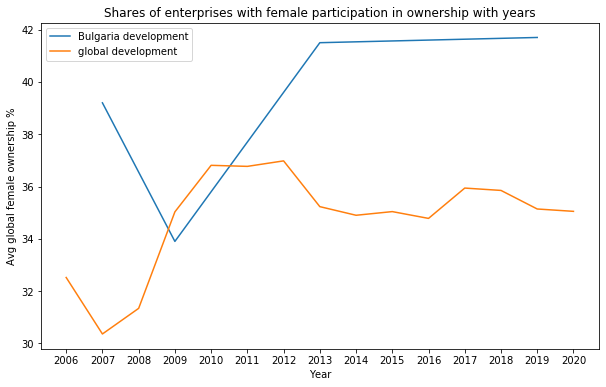

In [86]:
# choosing only the data for Bulgaria
bg_ownership = ownership_data[ownership_data.Economy == 'Bulgaria']

# ploting both Bulgaria and Global development of share of enterprises with female participation in ownership
# just using the plt.plot() before the plot_xy() to have it on the same graph
plt.figure(figsize = (10, 6))
plt.plot(bg_ownership.Year, bg_ownership['female participation in ownership'], label = 'Bulgaria development')
plot_xy(data_x, data_y, "global development")

Comparing to the global average the development of the share of enterprises with female participation in ownership seem stable. This might be one of the explanation of the good comparative in Bulgaria compared to 'Europe & Central Asia', 'High income: OECD' and 'All' visible in the horizontal bar chart made for all these 'Econimies' above.

***IV.*** **Conclusions**

The initially set problems consisted of:
1. Comparing obstacles for development of enterprises worldwide and in Bulgaria.

This part consisted of investigation and comparation of Bulgaria with the global average and the group/region where Bulgaria belongs. The identified obstacles as most problematic<a id='*'>[*](#*)</a> compared to these groups were 'practices of the informal sector', 'business licensing and permits' and 'inadequately educated workforce'. They were further compared with the whole set of countries. It became clear that Bulgaria is among the worst performing countries based on these three factors and checking what was their development in the last years explain its bad positionning. Unfortunately, there was no visible improvement there even when it was checked from the perspective of 'sector split' and 'top management gender split'. Any hypothesis that these splitted sub-groups have different opinion for the improvement of these obstacles couldn't be scientifically accepted, nor rejected. There is still possibility for the reader to draw some conclusions if the analysis is based only on the graphical time visualizations.

2. Gender equality in the enterprises worldwide and Bulgaria.

Regarding the 'Gender equality' a prompt check where is Bulgaria compared to global average, the region where Bulgaria belongs and the high income OECD countries showed that the country stand relatively good on all of the predefined in the surveys indicators. Short research what is important to get to the full equality (again using the indicators avalable in the dataset) was conducted. It showed that there should be increase in the 'female participation in ownership', along with improvement in 'majority female ownership' factor in order to keep the correlation level (as the data for the second factor is included in the other). A trial to make a split on pure female and pure male sector could not be confirmed at least from this dataset - at least not regarding the participation of women in the ownership, nor as a definition of the Top managemer gender. 

At the end a attempt of checking the development of Bulgaria compared to the global average regaring the identified as turnaround factor of 'female participation in ownership' was made. Bulgaria deleloped well in the previous years and it could be one of the reason for the current good results showed in the initial check. The door left open for a debate whether the global average was correctly designed, but I think I took the best out of this dataset.

### References:

The World Bank, The European Bank for Reconstruction and Development, and European Investment Bank. Bulgaria Enterprise Survey (ES) 2019, Ref. BGR_2019_ES_v01_M. Other Coutries Enterprise Surveys, Ref Unknown. Dataset downloaded from [https://www.enterprisesurveys.org/en] on [30.07.2020].

[*](#*) I just wanted to point out that these is often in different medias declaration how the 'corruption' and the lack of 'justice' are the main obstacles for the development of the countries' econimies and business, but from the perspective of this survey the identified obstacles were different. That doesn't mean that there is not something else hidden behind the given answers of the survey's questions that can hide this. An analysis with focus on that can be made in another report, and I mention it here as it was one of the possible path to explore in this report.